In [4]:
import pandas as pd

eds = pd.read_csv('eds.csv')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

drop_cols = [
    'index', 'player_id', 'player', 'pff_player_id', 'position', 'unit',
    'season_1', 'position_1', 'season',
    'run_block_snaps', 'receiving_snaps', 'pass_block_snaps', 'run_snaps', 'pass_snaps',
    'run_block', 'receiving', 'pass_block', 'run', 'pass', 'offense',
    'pass_rush_rank', 'receiving_rank', 'pass_rank', 'run_block_rank', 'pass_block_rank', 'run_rank',
    'season_1', 'position_1', 'pff_player_id'
]

eds_clean = eds.drop(columns=[c for c in drop_cols if c in eds.columns])
# tot_clean

target_cols = ['wick_score', 'capped_wick_score']
X = eds_clean.drop(columns=target_cols)
y = eds_clean[target_cols]

X_numeric = X.select_dtypes(include='number')

# Impute
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X_numeric)

# Only use the columns that were actually imputed
X_imputed = pd.DataFrame(X_imputed_array, columns=X_numeric.columns[:X_imputed_array.shape[1]])


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y['wick_score'], test_size=0.2, random_state=42
)

# print(X_numeric.columns)
# print(X_imputed.columns)
# print(X_train.columns)

c:\Users\bchm5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['offense_rank']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


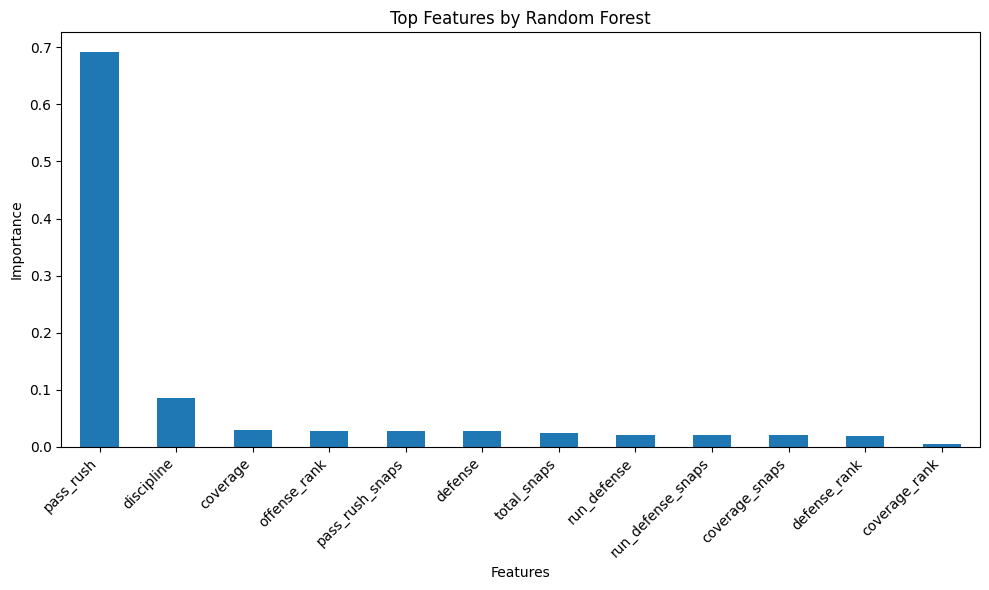

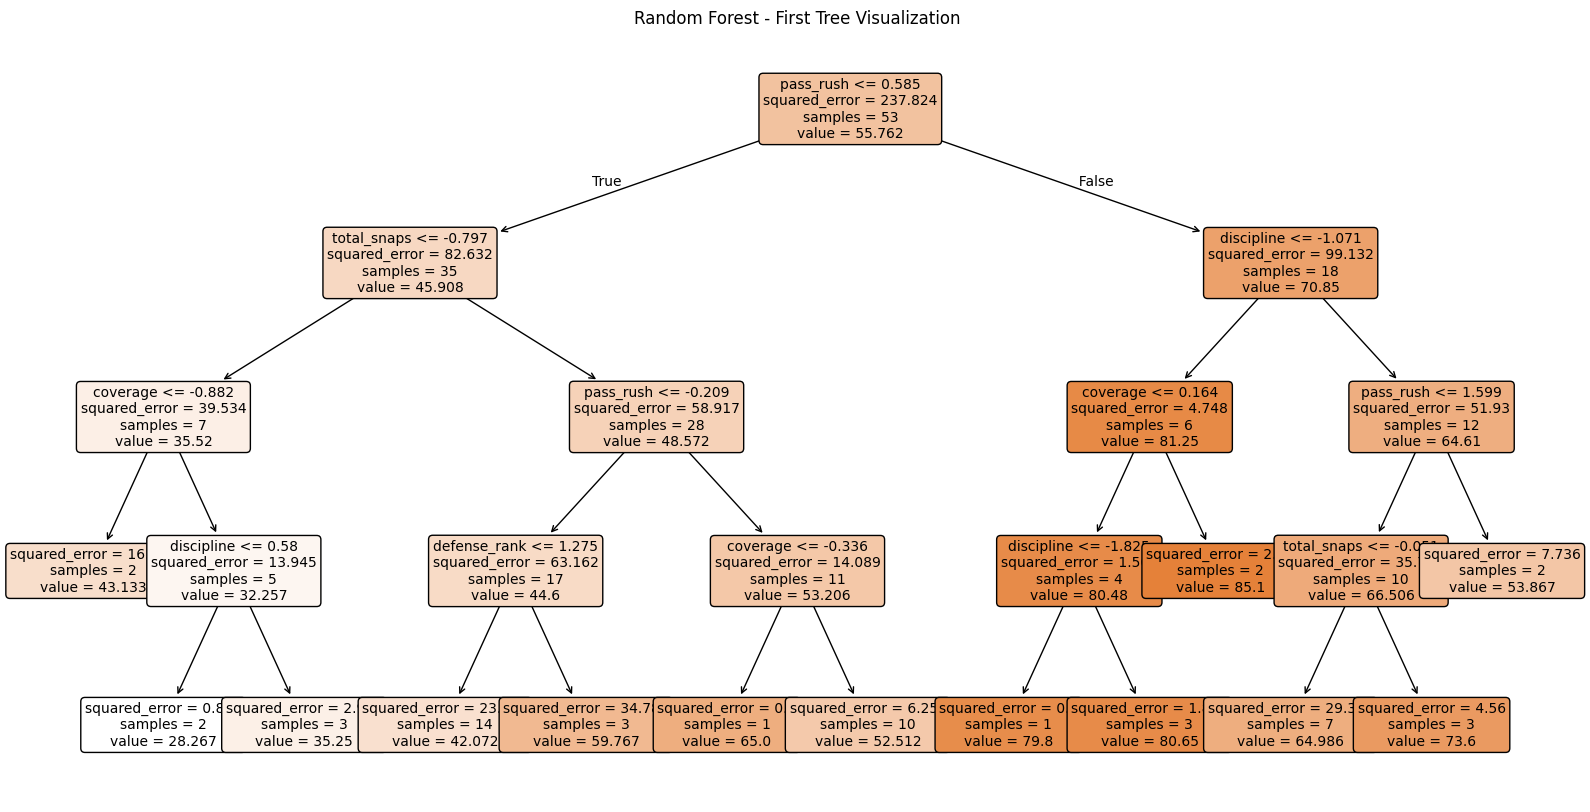

In [5]:
# ----------------------
# Random Forest model
# ----------------------
rf = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

feature_importance_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print("\nTop features by Random Forest:")
# print(feature_importance_rf)

plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar')
plt.title("Top Features by Random Forest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
# Plot the first tree in the forest
plot_tree(
    rf.estimators_[0],
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Random Forest - First Tree Visualization")
plt.show()


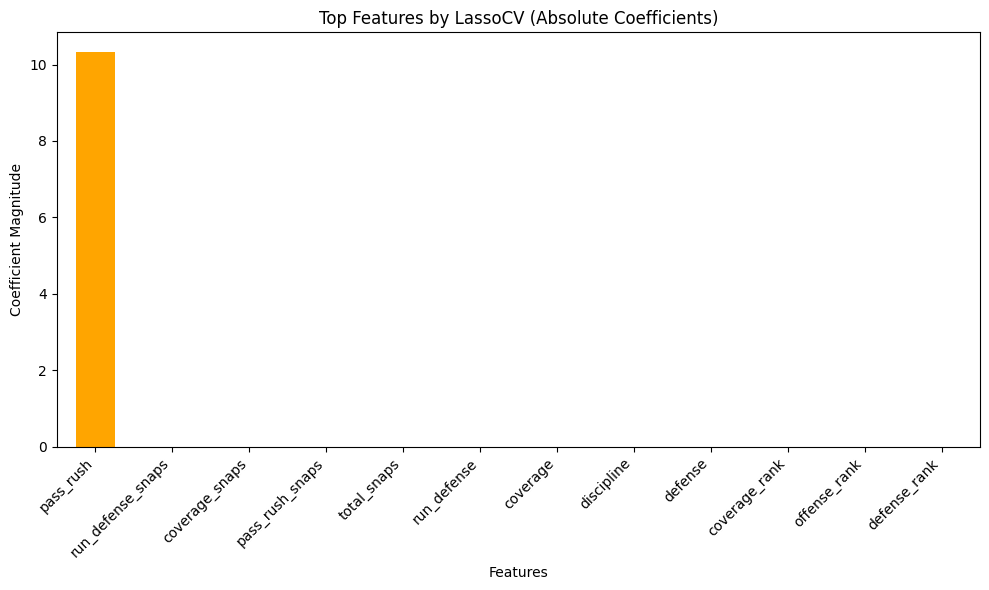

In [6]:
# ----------------------
# LassoCV model
# ----------------------
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Feature importance
feature_importance_lasso = pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)
# print("Top features by LassoCV:")
# print(feature_importance_lasso)

plt.figure(figsize=(10, 6))
feature_importance_lasso_abs = feature_importance_lasso.abs().sort_values(ascending=False)
feature_importance_lasso_abs.plot(kind='bar', color='orange')
plt.title("Top Features by LassoCV (Absolute Coefficients)")
plt.ylabel("Coefficient Magnitude")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()